In [32]:
#libraries for data analysis part
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for ML part
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline


In [33]:
#from google.colab import drive
#drive.mount('/content/drive')


In [34]:
dia_df= pd.read_csv('C:/Users/KIIT/Programs/Projects/Content/diabetes.csv') #import dataset and read it
dia_df.head()#shows only 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
dia_df.info()#get all information of data (column name,data type ,missing value,etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
dia_df = dia_df.drop([ "Pregnancies"], axis=1)#remove unwanted feature
dia_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [37]:
dia_df = dia_df.drop([ "SkinThickness"], axis=1)#remove unwanted feature
dia_df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [38]:
dia_df['Outcome'].value_counts()#count per outcome

Outcome
0    500
1    268
Name: count, dtype: int64

0-non diabetic
1-diabetic

In [39]:
dia_df.groupby('Outcome').mean()  #to find avg wrt Outcome

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,109.980000,68.184000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,100.335821,35.142537,0.550500,37.067164


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

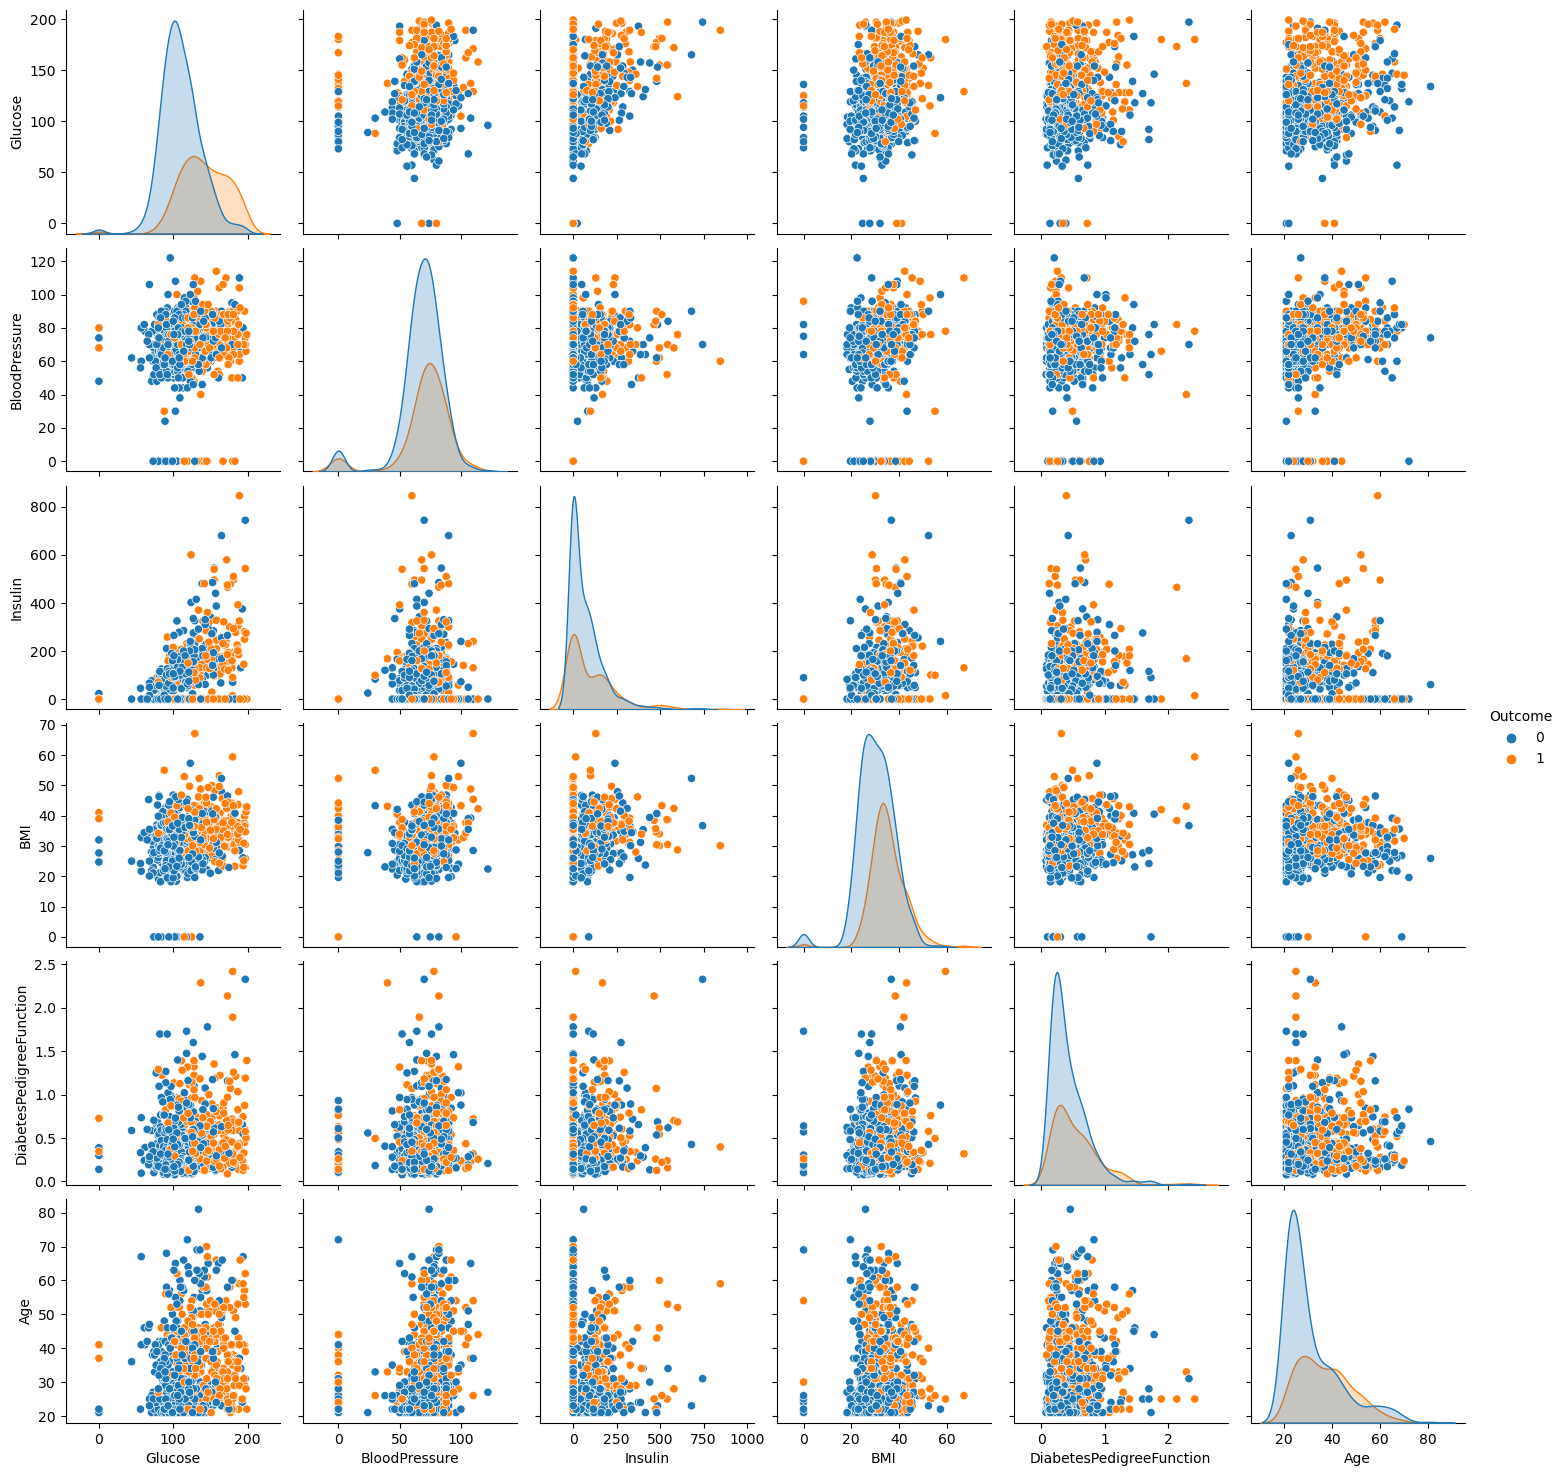

In [40]:
sns.pairplot(dia_df,hue = "Outcome")#vizualize the most determined feature that contribute to the outcome wrt outcome   (sns=sea born library,pairplot=map feature with each other)

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



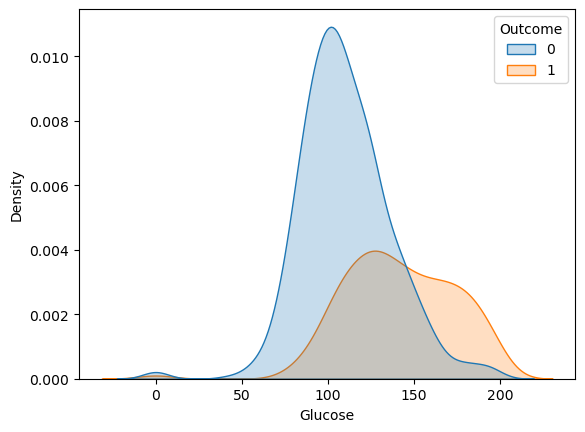

In [41]:
sns.kdeplot(data=dia_df, x="Glucose", hue="Outcome", fill=True)#to plot graph for vizualization of feature
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



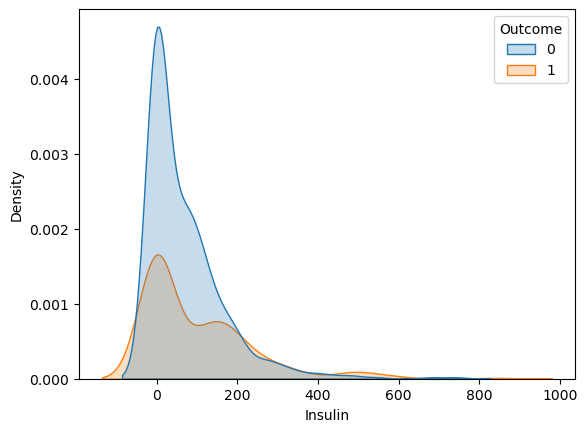

In [42]:
sns.kdeplot(data=dia_df, x="Insulin", hue="Outcome", fill=True)
plt.show()#to plot graph for vizualization of feature

In [43]:
corr = dia_df.corr()#correleation function to show correleation to find best dependecy
corr

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.088933,0.281805,0.041265,0.239528,0.065068
Insulin,0.331357,0.088933,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

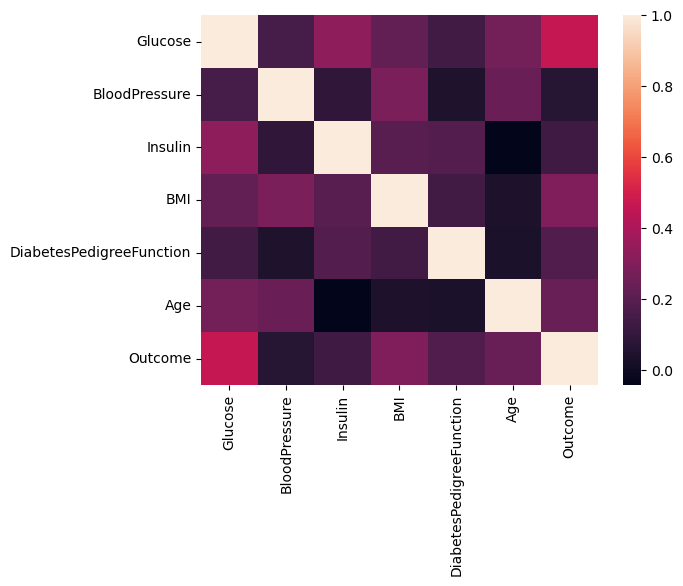

In [44]:
import seaborn as sns
sns.heatmap(corr,)#to vizualize graphically(lighter shade=best co-relation)

In [45]:
#separate the data and labels
x= dia_df.drop(columns= 'Outcome',axis=1)# all fearures
y= dia_df['Outcome']#labels
x.head()



,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,0,33.6,0.627,50
1,85,66,0,26.6,0.351,31
2,183,64,0,23.3,0.672,32
3,89,66,94,28.1,0.167,21
4,137,40,168,43.1,2.288,33


In [46]:
scaler =  StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

x=standardized_data
x

[[ 0.84832379  0.14964075 -0.69289057  0.20401277  0.46849198  1.4259954 ]
 [-1.12339636 -0.16054575 -0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [ 1.94372388 -0.26394125 -0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.27959377 -0.73518964 -0.68519336 -0.27575966]
 [ 0.1597866  -0.47073225 -0.69289057 -0.24020459 -0.37110101  1.17073215]
 [-0.8730192   0.04624525 -0.69289057 -0.20212881 -0.47378505 -0.87137393]]


array([[ 0.84832379,  0.14964075, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-1.12339636, -0.16054575, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.94372388, -0.26394125, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [ 0.1597866 , -0.47073225, -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.8730192 ,  0.04624525, -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

In [47]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,stratify=y,random_state=2)#y train=20,y test=80,stratify used to distribute evenly )

In [49]:
y_train.count()

614

In [50]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [51]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(768, 6) (614, 6) (154, 6)


now training of model starts


In [53]:
classifier = RandomForestClassifier()#as we use classification model,we use classifier.

In [54]:
classifier.fit(x_train,y_train)#training the model by giving only train data

RandomForestClassifier()

In [ ]:
# Create a list of feature names
feature_names = ["Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]

# Set the feature names for the DataFrame
x.set_axis(feature_names, axis=1, inplace=True)

Model evaluation


In [60]:
x_train_prediction = classifier.predict(x_train)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [61]:
training_data_accuracy

1.0

In [62]:
x_train_prediction = classifier.predict(x_test)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_test)

In [63]:
training_data_accuracy

0.7597402597402597

In [69]:
input_data = (185, 72, 80, 25, 0, 50)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You are not diabetic'
else:
    message = 'You are diabetic, Please contact a doctor'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[185  72  80  25   0  50]
[[185  72  80  25   0  50]]
[1]
Input Features:  (185, 72, 80, 25, 0, 50)
Prediction:  [1]
Prediction Message:  You are diabetic, Please contact a doctor


In [ ]:
for column in x.columns:
  print(column)

In [66]:
import pickle #library for app

In [ ]:
import os

# Define the path for the directory (replace with your desired directory path)
directory_path = '/path/to/health_data_analysis'  # Example: '/home/user/my_data_directory'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Check if the directory was created or already exists
if os.path.exists(directory_path):
    print(f"Directory '{directory_path}' has been created or already exists.")
else:
    print(f"Failed to create directory '{directory_path}'.")


In [ ]:
filename='diabetic_model.sav'#give file name

In [ ]:
pickle.dump(classifier,open(filename,'wb'))#save directory

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
input_data = (186, 72, 80, 25, 0, 50)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You are not diabetic'
else:
    message = 'You are diabetic, Please contact a doctor'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)
